In [275]:
import numpy as np
import pandas as pd
import os 
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import pickle

In [276]:
dataset = pd.read_csv('data_v2/final_dataset/total_combined.csv')

In [277]:
dataset.head()

,area,perimeter,height,width,r_value,g_value,b_value,index,label
0,214.0,314.060546,132.0,190.0,220,153,51,13.0,1.0
1,243.0,539.364146,132.0,203.0,219,125,49,13.0,1.0
2,242.5,46.158787,132.0,314.0,225,136,77,12.0,1.0
3,210.0,336.848772,132.0,314.0,223,147,26,10.0,1.0
4,189.0,196.771817,132.0,331.0,227,152,41,12.0,1.0


In [278]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3438 entries, 0 to 3437
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   area       3438 non-null   float64
 1   perimeter  3438 non-null   float64
 2   height     3438 non-null   float64
 3   width      3438 non-null   float64
 4   r_value    3438 non-null   int64  
 5   g_value    3438 non-null   int64  
 6   b_value    3438 non-null   int64  
 7   index      3438 non-null   float64
 8   label      3438 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 241.9 KB


In [279]:
X = dataset[['area','perimeter','height','height','width','r_value','g_value','b_value','index']]
X.head()

,area,perimeter,height,height,width,r_value,g_value,b_value,index
0,214.0,314.060546,132.0,132.0,190.0,220,153,51,13.0
1,243.0,539.364146,132.0,132.0,203.0,219,125,49,13.0
2,242.5,46.158787,132.0,132.0,314.0,225,136,77,12.0
3,210.0,336.848772,132.0,132.0,314.0,223,147,26,10.0
4,189.0,196.771817,132.0,132.0,331.0,227,152,41,12.0


In [280]:
y = dataset['label']

y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: label, dtype: float64

In [281]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

y=le.fit_transform(y)

In [282]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)


In [283]:
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier


# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=0)

# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)


#Predict the response for test dataset
y_pred = model1.predict(X_test)

C:\Users\Pranay\miniconda3\envs\cv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


In [284]:
#import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score


# calculate and print model accuracy
print("AdaBoost Classifier Model Accuracy:", accuracy_score(y_test, y_pred))

# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model1, open(filename, 'wb'))

AdaBoost Classifier Model Accuracy: 0.29505813953488375


In [285]:
# from sklearn import svm

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train, y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

In [286]:
# from sklearn import metrics

# # Model Accuracy: how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [287]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [288]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.998546511627907


In [289]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,   0,   0,   0,   0,   0],
       [  1, 101,   0,   0,   0,   0],
       [  0,   0, 135,   0,   0,   0],
       [  0,   0,   0,  93,   0,   0],
       [  0,   0,   0,   0, 110,   0],
       [  0,   0,   0,   0,   0, 133]], dtype=int64)

In [290]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

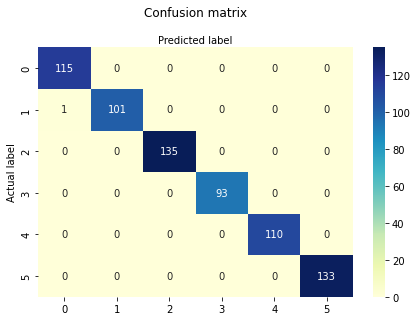

In [291]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [292]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred,average='micro'))
print("Recall:",metrics.recall_score(y_test, y_pred,average='micro'))

Accuracy: 0.998546511627907
Precision: 0.998546511627907
Recall: 0.998546511627907
